In [48]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import copy
import matplotlib.pyplot as plt

# Generate Data

In [49]:
np.random.seed(101)
n = 50
y = sp.stats.expon.rvs(size = n, scale = 1) #survival
c = sp.stats.expon.rvs(size= n,scale = 0.5) #censoring

t = copy.copy(y)
t[y>c] = c[y>c]
delta = np.ones(n,dtype = 'int')
delta[y>c] = 0
dy = 0.1
y_plot = np.arange(dy,10,dy)

#Normalize
scale = np.sum(t)/np.sum(delta)
t = t/scale

# Parametric Predictive

In [53]:
a_samp_smc = np.load('plot_files/sim_a_samp_smc.npy')
b_samp_smc = np.load('plot_files/sim_b_samp_smc.npy')
log_w_smc = np.load('plot_files/sim_log_w_smc.npy')
particle_ind_smc = np.load('plot_files/sim_particle_ind_smc.npy')
ESS_smc = np.load('plot_files/sim_ESS_smc.npy')
theta_hist_smc = np.load('plot_files/sim_theta_hist_smc.npy')

In [4]:
#SMC
#Compute mean samples 
B = np.shape(a_samp_smc)[0]
theta_samp_smc = b_samp_smc/(a_samp_smc-1)

#Normalize IS weights, reweight and resample
log_z_smc = sp.special.logsumexp(log_w_smc)
log_w_smc = log_w_smc - log_z_smc
w_smc = np.exp(log_w_smc)
theta_rw_smc = np.random.choice(theta_samp_smc,size = B, p = w_smc, replace = True) #Sample with replacement from empirical with IS weights
## ##

/Users/efong/virtualenv/surv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


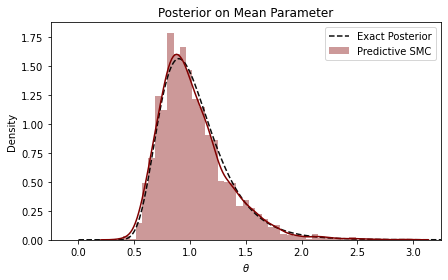

In [88]:
#Compute analytical posterior
f =plt.figure(figsize=(7,4))
theta_plot= np.arange(0,6,0.01)
a0 = np.load('plot_files/sim_a0.npy')
b0 = 1
a_post = a0 + np.sum(delta)
b_post = b0 + np.sum(t)
pdf_post= sp.stats.invgamma.pdf(theta_plot,a=a_post,scale = b_post)
plt.plot(theta_plot,pdf_post,label = 'Exact Posterior',color = 'k',linestyle = '--', alpha = 0.95)

sns.distplot(theta_rw_smc,label = 'Predictive SMC',color = 'maroon')
plt.legend()
plt.title('Posterior on Mean Parameter')
plt.xlabel(r'$\theta$')
plt.xlim((-0.25, 3.25))
f.savefig("plots/sim_param_smc_truth.pdf",bbox_inches='tight')



# Supplementary Experiments

## Ordering (naive importance sampling)

In [83]:
a_samp_IS = np.load('plot_files/sim_a_samp_IS.npy')
b_samp_IS = np.load('plot_files/sim_b_samp_IS.npy')
log_w_IS = np.load('plot_files/sim_log_w_IS.npy')

a_samp_IS_ord = np.load('plot_files/sim_a_samp_IS_ord.npy')
b_samp_IS_ord = np.load('plot_files/sim_b_samp_IS_ord.npy')
log_w_IS_ord = np.load('plot_files/sim_log_w_IS_ord.npy')

In [84]:
#IS
#Compute mean samples
theta_samp_IS = b_samp_IS/(a_samp_IS-1)

#Normalize IS weights, reweight and resample
log_z_IS = sp.special.logsumexp(log_w_IS)
log_w_IS = log_w_IS - log_z_IS
w_IS = np.exp(log_w_IS)
theta_rw_IS = np.random.choice(theta_samp_IS,size = B, p = w_IS, replace = True) #Sample with replacement from empirical with IS weights
ESS_IS = 1/np.sum(w_IS**2)
## ##

#IS ordered
#Compute mean samples
theta_samp_IS_ord = b_samp_IS_ord/(a_samp_IS_ord-1)

#Normalize IS weights, reweight and resample
log_z_IS_ord = sp.special.logsumexp(log_w_IS_ord)
log_w_IS_ord = log_w_IS_ord - log_z_IS_ord
w_IS_ord = np.exp(log_w_IS_ord)
theta_rw_IS_ord = np.random.choice(theta_samp_IS_ord,size = B, p = w_IS_ord, replace = True) #Sample with replacement from empirical with IS weights
ESS_IS_ord = 1/np.sum(w_IS_ord**2)
## ##

/Users/efong/virtualenv/surv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/efong/virtualenv/surv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


IS ESS is 967.2138592115782


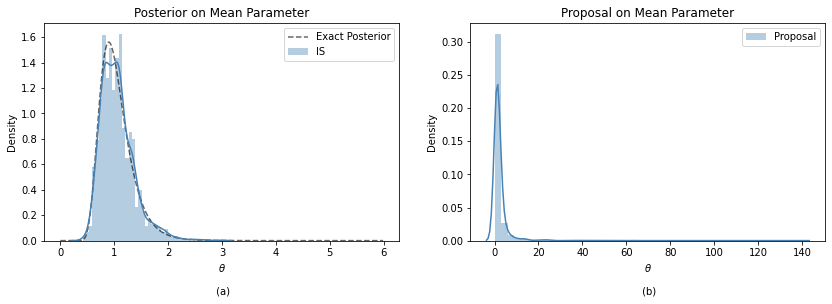

In [92]:
f =plt.figure(figsize=(14,4))
plt.subplot(1,2,1)

#Compute analytical posterior
plt.plot(theta_plot,pdf_post,label = 'Exact Posterior',color = 'k',linestyle = '--', alpha = 0.6)

sns.distplot(theta_rw_IS, label = 'IS',color = 'steelblue')
plt.title('Posterior on Mean Parameter')
plt.xlabel(r'$\theta$' + '\n\n (a)')
plt.legend()

plt.subplot(1,2,2)
plt.title('Proposal on Mean Parameter')
sns.distplot(theta_samp_IS, label = 'Proposal',color = 'steelblue')
plt.xlabel(r'$\theta$'+ '\n\n (b)')
#plt.plot(theta_plot,pdf_post,label = 'Exact Posterior',color = 'k',linestyle = '--', alpha = 0.6)
plt.legend()
print('IS ESS is {}'.format(1/np.sum(w_IS**2)))
f.savefig("plots/sim_param_IS.pdf",bbox_inches='tight')


/Users/efong/virtualenv/surv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/efong/virtualenv/surv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


IS ordered ESS is 7.625680698570282


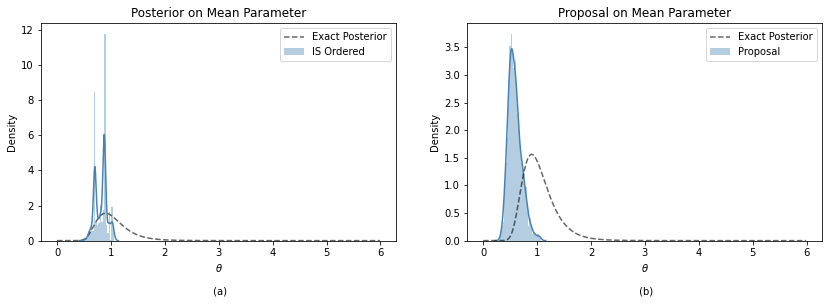

In [93]:
f =plt.figure(figsize=(14,4))
plt.subplot(1,2,1)

#Compute analytical posterior
plt.plot(theta_plot,pdf_post,label = 'Exact Posterior',color = 'k',linestyle = '--', alpha = 0.6)
sns.distplot(theta_rw_IS_ord, label = 'IS Ordered',color = 'steelblue')
plt.xlabel(r'$\theta$'+ '\n\n (a)')
plt.title('Posterior on Mean Parameter')
plt.legend()

plt.subplot(1,2,2)
plt.title('Proposal on Mean Parameter')
sns.distplot(theta_samp_IS_ord, label = 'Proposal',color = 'steelblue')
plt.xlabel(r'$\theta$'+ '\n\n (b)')
plt.plot(theta_plot,pdf_post,label = 'Exact Posterior',color = 'k',linestyle = '--', alpha = 0.6)

plt.legend()
print('IS ordered ESS is {}'.format(1/np.sum(w_IS_ord**2)))
f.savefig("plots/sim_param_IS_ordered.pdf",bbox_inches='tight')


## ESS and Convergence (for SMC)

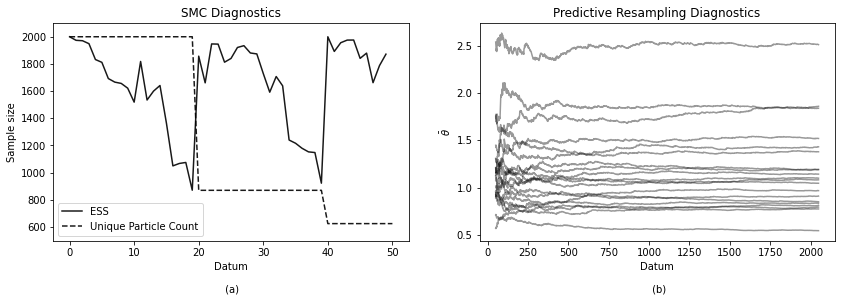

In [94]:
f =plt.figure(figsize=(14,4))
#SMC weight diagnostics
plt.subplot(1,2,1)
plt.plot(ESS_smc,label = 'ESS',color = 'k',alpha = 0.9)
plt.title('SMC Diagnostics')
n_unique = np.zeros(n+1)
for i in range(n+1):
    n_unique[i] = np.shape(np.unique(particle_ind_smc[i]))[0]
plt.plot(n_unique,label = 'Unique Particle Count',color = 'k',alpha = 0.9,linestyle = '--')
plt.xlabel('Datum'+ '\n\n (a)')
plt.ylabel('Sample size')
plt.legend(loc = 3)
plt.ylim(500,2100)


plt.subplot(1,2,2)
plt.title('Predictive Resampling Diagnostics')
T = 2000
for i in range(20):
    plt.plot(np.arange(n,n+T), theta_hist_smc[n:,i], color = 'k',alpha = 0.4)
plt.xlabel('Datum'+ '\n\n (b)')
plt.ylabel(r'$\bar{\theta}$')
f.savefig("plots/sim_diagnostics.pdf",bbox_inches='tight')
